# Fourier transform to identify seasonal periods

In this notebook we will show...

In [6]:
import re
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_context("talk")

# Data set synopsis

The air passengers dataset is the monthly totals of international airline passengers, from 1949 to 1960, in units of 1000s. 

For instructions on how to download, prepare, and store the dataset, refer to notebook number 5, in the folder "01-Create-Datasets" from this repo.

In [123]:
data = pd.read_csv(
    "../Datasets/victoria_electricity_demand.csv",
    usecols=["demand", "date_time"],
    parse_dates=["date_time"],
    index_col=["date_time"],
)

## Plot the data

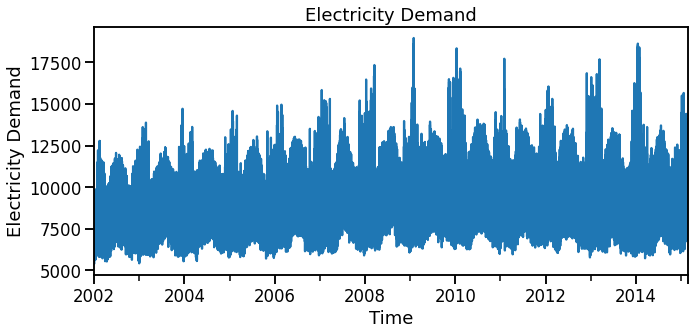

In [124]:
fig, ax = plt.subplots(figsize=[10, 5])
data.plot(y="demand", figsize=[10, 5], legend=None, ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Electricity Demand")
ax.set_title("Electricity Demand")
plt.tight_layout()

# Fourier transform with scipy

In [125]:
from numpy.fft import rfft, rfftfreq
from scipy.signal import find_peaks

In [126]:
fourier_transform = rfft(a=data["demand"])
power_spectral_density = np.abs(fourier_transform)
sampling_freq = 1 # 1 observation per hour

In [127]:
freq = rfftfreq(n=len(data), d=1/sampling_freq)

In [128]:
df = pd.DataFrame(data={"freq": freq, "power":power_spectral_density})
df["period"] = 1 / df["freq"]

In [133]:
peak_index, peak_properties = find_peaks(x=df["power"], distance=1000)

In [134]:
df["is_peak"] = 0
df.loc[peak_index, ["is_peak"]] = 1

<AxesSubplot: xlabel='freq'>

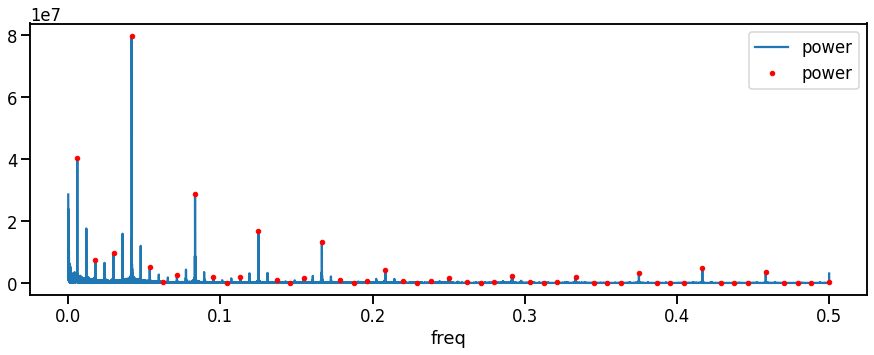

In [135]:
ax = df.iloc[1:].plot(x="freq", y="power", figsize=[15,5])
df[df["is_peak"] == 1].plot(x="freq", y="power", linestyle="None", marker=".", color="r", ax=ax)

In [138]:
(df.loc[peak_index]
   .sort_values(by=["power"], ascending=False)
   .head(15)
   .round(2)
)

,freq,power,period,is_peak
4807,0.04,79705307.20,24.00,1
687,0.01,40400528.94,167.93,1
9614,0.08,28848657.46,12.00,1
14421,0.12,16834861.08,8.00,1
19228,0.17,13363644.38,6.00,1
3434,0.03,9712706.01,33.60,1
2060,0.02,7240695.71,56.00,1
6180,0.05,5188307.04,18.67,1
48070,0.42,4874515.79,2.40,1
24022,0.21,4257390.05,4.80,1
